In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
from sklearn.cluster import KMeans

In [ ]:
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])

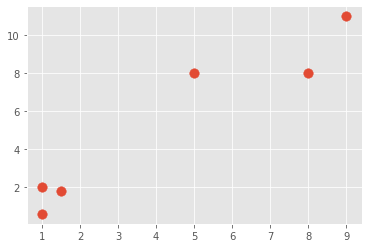

In [ ]:
plt.scatter(X[:,0], X[:,1], s=90)
plt.show()

In [ ]:
colors = 10*["g","r","c","b","k"]

In [ ]:
f= [1,2,3,0]
v=f.index(min(f))
print(v)

3


In [ ]:
class K_Means:
   
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):
        #centroid dict
        self.centroids = {}
        # since k=2 we will select first two points from the data and we will declare that as a centroid
        for i in range(self.k):#2->1
            self.centroids[i] = data[i]
        
        # we will run this loop for 300 times (300 iteration)
        for i in range(self.max_iter):
            self.classifications = {}  

            for i in range(self.k):
                self.classifications[i] = [] #{0: [], 1: []}
            for point in data:  #finding distance from centroid , finding mini value , putting them in classification
                distances = [np.linalg.norm(point - self.centroids[centroid]) for centroid in 
                                                                                    self.centroids]
                classification = distances.index(min(distances)) #find the index of the min distance
                self.classifications[classification].append(point)
            prev_centroids = dict(self.centroids)
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
            optimized = True
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:#0.01
                    optimized = False
                    break
            if optimized:
                break
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
model = K_Means(k=6)
model.fit(X)

In [ ]:
model.centroids

{0: array([1., 2.]),
 1: array([1.5, 1.8]),
 2: array([5., 8.]),
 3: array([8., 8.]),
 4: array([1. , 0.6]),
 5: array([ 9., 11.])}

In [ ]:
model.classifications

{0: [array([1., 2.])],
 1: [array([1.5, 1.8])],
 2: [array([5., 8.])],
 3: [array([8., 8.])],
 4: [array([1. , 0.6])],
 5: [array([ 9., 11.])]}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from collections import Counter
import pandas as pd
import random





df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?','-999999',inplace=True)
df.drop(['id',"label"],axis=1,inplace=True)
full_data  = df.astype('float').values.tolist()
print(full_data)

X = np.array(full_data)

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0], [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0], [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0], [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0], [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0], [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0], [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0], [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0], [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0], [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0], [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0], [5.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 1.0], [1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0], [8.0, 7.0, 5.0, 10.0, 7.0, 9.0, 5.0, 5.0, 4.0], [7.0, 4.0, 6.0, 4.0, 6.0, 1.0, 4.0, 3.0, 1.0], [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0], [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0], [10.0, 7.0, 7.0, 6.0, 4.0, 10.0, 4.0, 1.0, 2.0], [6.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0], [7.0, 3.0, 2.0, 10.0, 5.0, 10.0, 5.0, 4.0, 4.0], [1

In [ ]:
clf = KMeans(n_clusters=3)
clf.fit(X)
clf.cluster_centers_

array([[ 2.96412556e+00,  1.27578475e+00,  1.38565022e+00,
         1.31614350e+00,  2.09641256e+00,  1.28026906e+00,
         2.08744395e+00,  1.26905830e+00,  1.07399103e+00],
       [ 3.37500000e+00,  2.43750000e+00,  2.87500000e+00,
         1.81250000e+00,  2.43750000e+00, -9.99999000e+05,
         3.12500000e+00,  2.75000000e+00,  1.00000000e+00],
       [ 7.22362869e+00,  6.67932489e+00,  6.65822785e+00,
         5.67932489e+00,  5.37552743e+00,  7.80590717e+00,
         6.00000000e+00,  5.88185654e+00,  2.59915612e+00]])

In [ ]:
clf.classifications

AttributeError: ignored

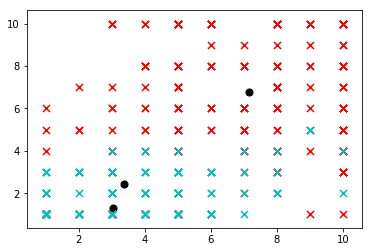

In [ ]:
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=50, linewidths=1)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=50, linewidths=1)


In [ ]:
plt.show()

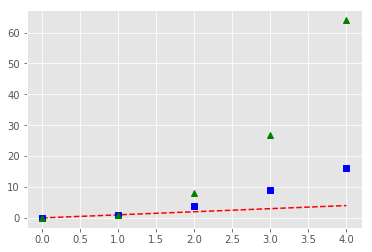

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 1)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

KeyboardInterrupt: 

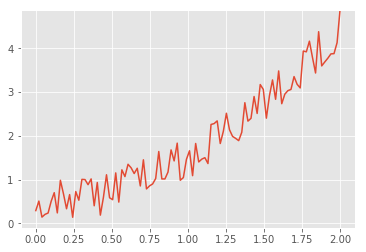

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pullData = open("sampleText.txt","r").read()
    dataArray = pullData.split('\n')
    xar = []
    yar = []
    for eachLine in dataArray:
        if len(eachLine)>1:
            x,y = eachLine.split(',')
            xar.append(int(x))
            yar.append(int(y))
    ax1.clear()
    ax1.plot(xar,yar)
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()

In [ ]:
def hello():
    global x
    x=6

In [ ]:
hello()

In [ ]:
def hi():
    print(x)

In [ ]:
hi()

6


In [ ]:
class person:
    def __init__(self,name):
        self.name = name
        
        
    def greet(self):
        print("hello",self.name)
        
        
    def bye():
        print("byr")


In [ ]:
p1 = person("chirag")

In [ ]:
p1.greet()

hello chirag


In [ ]:
p2 = person("nishant")
p2.greet()


hello nishant


In [ ]:
centroid = {0:[1,2],1:[1.5,1.8]}
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])

classification = {0:[],1:[]}

<IPython.core.display.Javascript object>

In [ ]:
for data in X:
    dist = [np.linalg.norm(data-np.array(centroid[i])) for i in centroid]
    classs = dist.index(min(dist))
    classification[classs].append(data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
classification
prev_centroid = dict(centroid)

In [ ]:
np.average([[1,2],[3,4]],axis=0)

<IPython.core.display.Javascript object>

array([2., 3.])

In [ ]:
for i in classification:
    centroid[i] = np.average(classification[i],axis=0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
centroid

{0: array([1., 2.]), 1: array([4.9 , 5.88])}

In [ ]:
prev_centroid

{0: [1, 2], 1: [1.5, 1.8]}

In [ ]:
{0: array([4., 2.]), 1: array([1 , 1]),.....}
{0: array([8., 2.]), 1: array([1,1]).........}
    
    
max_iter
    optimized = True
                
    for c in self.centroids:
        original_centroid = prev_centroids[c]#[4.9,5.6]
        current_centroid = self.centroids[c]#[1.5,1.8]
        if org != current #[4,5]!=[1,1]
            optimized = False
            break


    if optimized:
        break